# Evaluation of the benchmark dataset

In [40]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt

## Evaluate max. temperature of 2D Pflotran dataset

In [114]:
folder = "benchmark_testcases_4/RUN_3/"
filename = os.path.join(folder, "pflotran.h5")
with h5py.File(filename, "r") as file:
    maxtemp = np.max(file['   4 Time  2.75000E+01 y']['Temperature [C]'])
    temp_reshape = np.reshape(file['   4 Time  2.75000E+01 y']['Temperature [C]'], (20, 256), order='F')
    print(maxtemp, np.where(temp_reshape==maxtemp))

10.933196999886809 (array([9]), array([23]))


## Evaluate max. temperature of groundtruth dataset

In [115]:
folder = "benchmark_dataset_3d_fine/RUN_3/"
filename = os.path.join(folder, "pflotran.h5")
with h5py.File(filename, "r") as file:
    maxtemp = np.max(file['   4 Time  2.75000E+01 y']['Temperature [C]'])
    temp_reshape = np.reshape(file['   4 Time  2.75000E+01 y']['Temperature [C]'], (100, 1280, 5), order='F')
    print(maxtemp, np.where(temp_reshape==maxtemp))

14.101626311396641 (array([49]), array([119]), array([2]))


## Evaluate plume of 2D Pflotran dataset

ValueError: zero-size array to reduction operation maximum which has no identity

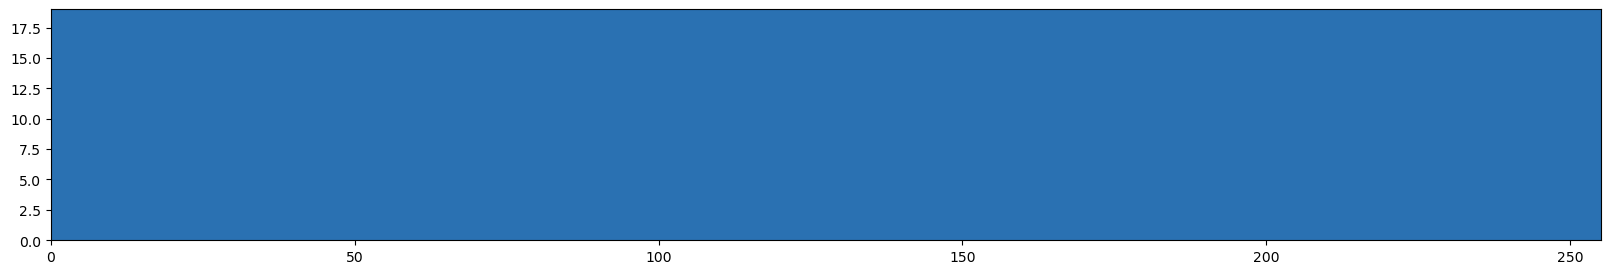

In [177]:
folder = "benchmark_testcases_4/RUN_3"
filename = os.path.join(folder, "pflotran.h5")
with h5py.File(filename, "r") as file:
    temp = file['   4 Time  2.75000E+01 y']['Temperature [C]']
    temp = np.reshape(temp, (20, 256), order='F')
    _, axes = plt.subplots(1,1,sharex=True,figsize=(20,3))
    contours = plt.contourf(temp, levels=np.arange(10.6, 15.6, 1), cmap='RdBu_r')
    path = contours.collections[0].get_paths()[0]
    vertices = path.vertices
# remove boundary values from vertices
vertices = vertices[vertices[:,0] != 0]
vertices = vertices[vertices[:,1] != 0]
vertices = vertices[vertices[:,0] != 255]
vertices = vertices[vertices[:,1] != 19]

# plot path.vertices
plt.plot(vertices[:,0], vertices[:,1], 'yo')

print("max. width plume", np.round((np.max(vertices[:,1])-np.min(vertices[:,1]))*5, 2))
plume_len = np.round((np.max(vertices[:,0])-np.min(vertices[:,0]))*5, 2)
# if plume_len < 0:
#     plume_len = np.round(np.max(vertices[:,0])*5, 2)
print("length plume", plume_len)
    

## Evaluate plume of groundtruth dataset

max. width plume 1.18
length plume 114.07


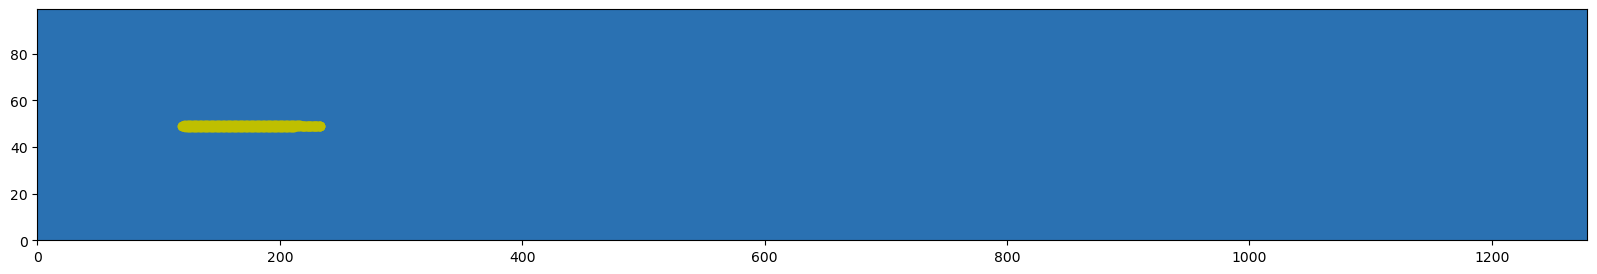

In [176]:
folder = "benchmark_dataset_3d_fine/RUN_3/"
filename = os.path.join(folder, "pflotran.h5")
with h5py.File(filename, "r") as file:
    temp = file['   4 Time  2.75000E+01 y']['Temperature [C]']
    temp = np.reshape(temp, (100, 1280, 5), order='F')
    _, axes = plt.subplots(1,1,sharex=True,figsize=(20,3))
    contours = plt.contourf(temp[:,:,3], levels=np.arange(10.6, 15.6, 1), cmap='RdBu_r')
    path = contours.collections[0].get_paths()[0]
    vertices = path.vertices
# remove boundary values from vertices
vertices = vertices[vertices[:,0] != 0]
vertices = vertices[vertices[:,1] != 0]
vertices = vertices[vertices[:,0] != 1279]
vertices = vertices[vertices[:,1] != 99]

# plot path.vertices
plt.plot(vertices[:,0], vertices[:,1], 'yo')

print("max. width plume", np.round((np.max(vertices[:,1])-np.min(vertices[:,1])), 2))
plume_len = np.round(np.max(vertices[:,0])-np.min(vertices[:,0]), 2)
print("length plume", plume_len) #, np.min(vertices[:,0]), np.round((np.max(vertices[:,0])-0), 2))